In [1]:
import osmnx as ox
import matplotlib.pyplot as plt 
import osmnx as ox
import pandas as pd
from geopy import distance
import requests # to call the openmap/google apis
import json
import datetime
import math
import itertools
import numpy as np

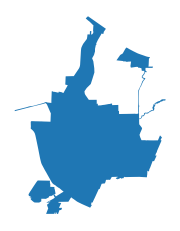

In [2]:
rochester_city = ox.geocode_to_gdf('Rochester, NY, USA')
ax = ox.project_gdf(rochester_city).plot()
_ = ax.axis('off')

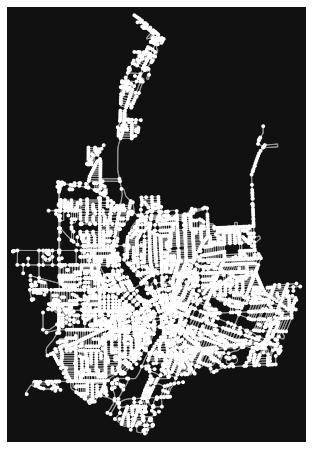

(<Figure size 576x576 with 1 Axes>, <AxesSubplot:>)

In [3]:
rochester_graph = ox.graph_from_place('Rochester, NY, USA', network_type='drive')
ox.plot_graph(rochester_graph)

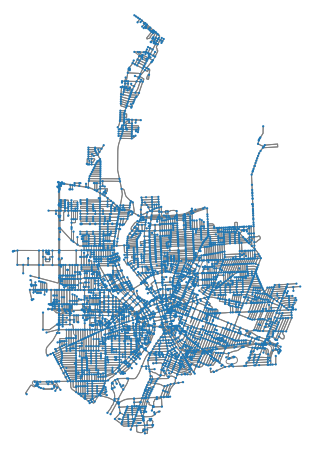

(<Figure size 576x576 with 1 Axes>, <AxesSubplot:>)

In [4]:
import matplotlib.pyplot as plt 
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']
ox.plot.plot_graph(rochester_graph, bgcolor='#FFFFFF', node_color=colors[0], edge_color='grey', node_size=5)

In [5]:
# Sample bounding box in Rochester, NY - Plymouth exchange - Mayors Heights
north, south, east, west = 43.175426,43.182624,-77.576317,-77.567476

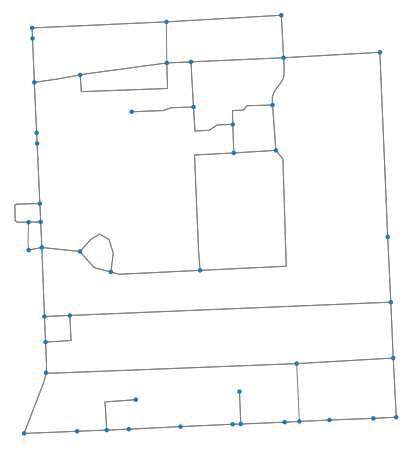

(<Figure size 576x576 with 1 Axes>, <AxesSubplot:>)

In [6]:
# create a network from the above bounded box
G = ox.graph_from_bbox(north, south, east, west, network_type="drive_service")
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']
ox.plot.plot_graph(G, bgcolor='#FFFFFF', node_color=colors[0], edge_color='gray', node_size=20)

In [7]:
#Number of nodes within the selected area
count=0
for i in G.nodes:
    count=count+1
print(count)

48


In [8]:
for i in G.nodes:
    print(i)

212633055
212642328
212642331
212643431
212643433
212643436
212643439
212643441
212643444
212643448
212643452
212643455
212691752
212691757
212691760
212691763
212694453
212716579
212716582
212731609
212731612
212759870
212760009
212761380
212780001
212903624
212903626
1517558999
1517559000
1517559004
1517559027
1517559028
1517559040
5947812636
5947812642
5947812643
5947812646
5947812649
7085465647
7085465649
7085465650
7085465651
8078096987
8078096994
8578603456
8578603458
8578603459
8578603464


In [9]:
#Add locations to dataframe
Locations = []
for i in G.nodes:
    Locations.append(i)

In [10]:
Locations

[212633055,
 212642328,
 212642331,
 212643431,
 212643433,
 212643436,
 212643439,
 212643441,
 212643444,
 212643448,
 212643452,
 212643455,
 212691752,
 212691757,
 212691760,
 212691763,
 212694453,
 212716579,
 212716582,
 212731609,
 212731612,
 212759870,
 212760009,
 212761380,
 212780001,
 212903624,
 212903626,
 1517558999,
 1517559000,
 1517559004,
 1517559027,
 1517559028,
 1517559040,
 5947812636,
 5947812642,
 5947812643,
 5947812646,
 5947812649,
 7085465647,
 7085465649,
 7085465650,
 7085465651,
 8078096987,
 8078096994,
 8578603456,
 8578603458,
 8578603459,
 8578603464]

In [11]:
roc_data = pd.DataFrame(Locations)
roc_data.rename(columns = {0:'Locations'}, inplace = True)
roc_data

Locations
0    212633055
1    212642328
2    212642331
3    212643431
4    212643433
5    212643436
6    212643439
7    212643441
8    212643444
9    212643448
10   212643452
11   212643455
12   212691752
13   212691757
14   212691760
15   212691763
16   212694453
17   212716579
18   212716582
19   212731609
20   212731612
21   212759870
22   212760009
23   212761380
24   212780001
25   212903624
26   212903626
27  1517558999
28  1517559000
29  1517559004
30  1517559027
31  1517559028
32  1517559040
33  5947812636
34  5947812642
35  5947812643
36  5947812646
37  5947812649
38  7085465647
39  7085465649
40  7085465650
41  7085465651
42  8078096987
43  8078096994
44  8578603456
45  8578603458
46  8578603459
47  8578603464

In [12]:
#Appending lats and longitudes
latitude = []
longitude = []
for i in Locations:
    latitude.append(G.nodes[i].get('y'))
    longitude.append(G.nodes[i].get('x'))

In [13]:
roc_data['Latitude'] = latitude
roc_data['Longitude'] = longitude

In [14]:
#Display the locations along with latitudes and longitudes in the dataframe
roc_data

Locations   Latitude  Longitude
0    212633055  43.175840 -77.574994
1    212642328  43.176000 -77.570042
2    212642331  43.176939 -77.570103
3    212643431  43.175805 -77.576176
4    212643433  43.175874 -77.573842
5    212643436  43.175916 -77.572690
6    212643439  43.175954 -77.571530
7    212643441  43.175958 -77.571347
8    212643444  43.175988 -77.570370
9    212643448  43.176023 -77.569371
10   212643452  43.176050 -77.568394
11   212643455  43.176069 -77.567883
12   212691752  43.181509 -77.575948
13   212691757  43.181825 -77.572996
14   212691760  43.181909 -77.570393
15   212691763  43.181998 -77.568249
16   212694453  43.176484 -77.571377
17   212716579  43.177705 -77.575722
18   212716582  43.177938 -77.568005
19   212731609  43.176791 -77.575687
20   212731612  43.177030 -77.567951
21   212759870  43.182492 -77.573005
22   212760009  43.178998 -77.568074
23   212761380  43.182599 -77.570445
24   212780001  43.182394 -77.575997
25   212903624  43.178827 -77.575780
26   212903626  43.182224 -77.575988
27  1517558999  43.178427 -77.574242
28  1517559000  43.178454 -77.572256
29  1517559004  43.178761 -77.574930
30  1517559027  43.180362 -77.571503
31  1517559028  43.180405 -77.570566
32  1517559040  43.181141 -77.570641
33  5947812636  43.180825 -77.571526
34  5947812642  43.181842 -77.572457
35  5947812643  43.181630 -77.574926
36  5947812646  43.181109 -77.572401
37  5947812649  43.181032 -77.573778
38  7085465647  43.177722 -77.575156
39  7085465649  43.177289 -77.575698
40  7085465650  43.175859 -77.574335
41  7085465651  43.176353 -77.573685
42  8078096987  43.180517 -77.575886
43  8078096994  43.180690 -77.575896
44  8578603456  43.178784 -77.576074
45  8578603458  43.179237 -77.576076
46  8578603459  43.179241 -77.575806
47  8578603464  43.179540 -77.575825

In [15]:
#Converting the dataframe to a csv
roc_data.to_csv("BoxAreaRochester.csv")

In [16]:
roc_df = pd.read_csv("BoxAreaRochester.csv")

In [17]:
roc_df

Unnamed: 0   Locations   Latitude  Longitude
0            0   212633055  43.175840 -77.574994
1            1   212642328  43.176000 -77.570042
2            2   212642331  43.176939 -77.570103
3            3   212643431  43.175805 -77.576176
4            4   212643433  43.175874 -77.573842
5            5   212643436  43.175916 -77.572690
6            6   212643439  43.175954 -77.571530
7            7   212643441  43.175958 -77.571347
8            8   212643444  43.175988 -77.570370
9            9   212643448  43.176023 -77.569371
10          10   212643452  43.176050 -77.568394
11          11   212643455  43.176069 -77.567883
12          12   212691752  43.181509 -77.575948
13          13   212691757  43.181825 -77.572996
14          14   212691760  43.181909 -77.570393
15          15   212691763  43.181998 -77.568249
16          16   212694453  43.176484 -77.571377
17          17   212716579  43.177705 -77.575722
18          18   212716582  43.177938 -77.568005
19          19   212731609  43.176791 -77.575687
20          20   212731612  43.177030 -77.567951
21          21   212759870  43.182492 -77.573005
22          22   212760009  43.178998 -77.568074
23          23   212761380  43.182599 -77.570445
24          24   212780001  43.182394 -77.575997
25          25   212903624  43.178827 -77.575780
26          26   212903626  43.182224 -77.575988
27          27  1517558999  43.178427 -77.574242
28          28  1517559000  43.178454 -77.572256
29          29  1517559004  43.178761 -77.574930
30          30  1517559027  43.180362 -77.571503
31          31  1517559028  43.180405 -77.570566
32          32  1517559040  43.181141 -77.570641
33          33  5947812636  43.180825 -77.571526
34          34  5947812642  43.181842 -77.572457
35          35  5947812643  43.181630 -77.574926
36          36  5947812646  43.181109 -77.572401
37          37  5947812649  43.181032 -77.573778
38          38  7085465647  43.177722 -77.575156
39          39  7085465649  43.177289 -77.575698
40          40  7085465650  43.175859 -77.574335
41          41  7085465651  43.176353 -77.573685
42          42  8078096987  43.180517 -77.575886
43          43  8078096994  43.180690 -77.575896
44          44  8578603456  43.178784 -77.576074
45          45  8578603458  43.179237 -77.576076
46          46  8578603459  43.179241 -77.575806
47          47  8578603464  43.179540 -77.575825

In [18]:
roc_df = roc_df.drop(['Locations'],axis=1)
roc_df.rename(columns = {'Latitude':'Left'}, inplace = True)
roc_df.rename(columns = {'Longitude':'Right'}, inplace = True)

In [19]:
roc_df

Unnamed: 0       Left      Right
0            0  43.175840 -77.574994
1            1  43.176000 -77.570042
2            2  43.176939 -77.570103
3            3  43.175805 -77.576176
4            4  43.175874 -77.573842
5            5  43.175916 -77.572690
6            6  43.175954 -77.571530
7            7  43.175958 -77.571347
8            8  43.175988 -77.570370
9            9  43.176023 -77.569371
10          10  43.176050 -77.568394
11          11  43.176069 -77.567883
12          12  43.181509 -77.575948
13          13  43.181825 -77.572996
14          14  43.181909 -77.570393
15          15  43.181998 -77.568249
16          16  43.176484 -77.571377
17          17  43.177705 -77.575722
18          18  43.177938 -77.568005
19          19  43.176791 -77.575687
20          20  43.177030 -77.567951
21          21  43.182492 -77.573005
22          22  43.178998 -77.568074
23          23  43.182599 -77.570445
24          24  43.182394 -77.575997
25          25  43.178827 -77.575780
26          26  43.182224 -77.575988
27          27  43.178427 -77.574242
28          28  43.178454 -77.572256
29          29  43.178761 -77.574930
30          30  43.180362 -77.571503
31          31  43.180405 -77.570566
32          32  43.181141 -77.570641
33          33  43.180825 -77.571526
34          34  43.181842 -77.572457
35          35  43.181630 -77.574926
36          36  43.181109 -77.572401
37          37  43.181032 -77.573778
38          38  43.177722 -77.575156
39          39  43.177289 -77.575698
40          40  43.175859 -77.574335
41          41  43.176353 -77.573685
42          42  43.180517 -77.575886
43          43  43.180690 -77.575896
44          44  43.178784 -77.576074
45          45  43.179237 -77.576076
46          46  43.179241 -77.575806
47          47  43.179540 -77.575825

In [20]:
import requests # to call the openmap/google apis -- OSRM for distances
r = requests.get(f"""http://router.project-osrm.org/route/v1/car/{roc_df.loc[0, "Right"]},{roc_df.loc[0, "Left"]};{roc_df.loc[6, "Right"]},{roc_df.loc[6, "Left"]}?overview=false""")

In [21]:
r.content

b'{"code":"Ok","waypoints":[{"hint":"sK2yiScv8YAAAAAAPwAAAAAAAAAAAAAAAAAAAKlgwEIAAAAAAAAAAAAAAAA_AAAAAAAAAAAAAADIRAAArkxg-6DPkgKuTGD7oM-SAgAAvxCWLadt","distance":0,"location":[-77.574994,43.17584],"name":"Clifford Avenue"},{"hint":"FLKyiRaysokAAAAACgAAAAAAAAAAAAAAAAAAAKgvbkEAAAAAAAAAAAAAAAAKAAAAAAAAAAAAAADIRAAANlpg-xLQkgI2WmD7EtCSAgAAjwWWLadt","distance":0,"location":[-77.57153,43.175954],"name":"Clifford Avenue"}],"routes":[{"legs":[{"steps":[],"weight":18.4,"distance":281.3,"summary":"","duration":18.4}],"weight_name":"routability","weight":18.4,"distance":281.3,"duration":18.4}]}'

In [22]:
import json
df3 = pd.DataFrame()
for j in roc_df.index:
    list1 = []
    for i in roc_df.index:
        r = requests.get(f"""http://router.project-osrm.org/route/v1/car/{roc_df.loc[j, "Right"]},{roc_df.loc[j, "Left"]};{roc_df.loc[i, "Right"]},{roc_df.loc[i, "Left"]}?overview=false""")
        list1.append(json.loads(r.content)["routes"][0]["distance"])
    df3[j] = list1

In [23]:
json.loads(r.content)

{'code': 'Ok',
 'waypoints': [{'hint': 'ILOyiTazsolHAAAAAAAAAAAAAAAAAAAAUE7ZQgAAAAAAAAAAAAAAAEcAAAAAAAAAAAAAAAAAAADIRAAAb0lg-xTekgJvSWD7FN6SAgAAHwuWLadt',
   'distance': 0,
   'location': [-77.575825, 43.17954],
   'name': 'North Goodman Street'},
  {'hint': 'ILOyiTazsolHAAAAAAAAAAAAAAAAAAAAUE7ZQgAAAAAAAAAAAAAAAEcAAAAAAAAAAAAAAAAAAADIRAAAb0lg-xTekgJvSWD7FN6SAgAAHwuWLadt',
   'distance': 0,
   'location': [-77.575825, 43.17954],
   'name': 'North Goodman Street'}],
 'routes': [{'legs': [{'steps': [],
     'weight': 0,
     'distance': 0,
     'summary': '',
     'duration': 0}],
   'weight_name': 'routability',
   'weight': 0,
   'distance': 0,
   'duration': 0}]}

In [24]:
df3

0       1       2       3       4       5       6       7       8   \
0      0.0   402.1   506.6    96.0    93.5   187.1   281.3   296.1   375.4   
1    402.1     0.0   104.6   498.0   308.5   215.0   120.8   106.0    26.6   
2    859.2   457.2     0.0   570.1   765.7   672.2   578.0   563.1   483.8   
3     96.0   498.0   602.6     0.0   189.5   283.0   377.2   392.1   471.4   
4     93.5   308.5   413.1   189.5     0.0    93.6   187.7   202.6   281.9   
5    187.1   215.0   319.5   283.0    93.6     0.0    94.2   109.0   188.4   
6    281.3   120.8   225.4   377.2   187.7    94.2     0.0    14.9    94.2   
7    296.1   106.0   210.5   392.1   202.6   109.0    14.9     0.0    79.3   
8    375.4    26.6   131.2   471.4   281.9   188.4    94.2    79.3     0.0   
9    456.6    54.5   159.0   552.5   363.0   269.5   175.3   160.4    81.1   
10   535.9   133.8   238.3   631.8   442.3   348.8   254.6   239.7   160.4   
11   577.4   175.3   279.9   673.3   483.8   390.3   296.1   281.2   201.9   
12   738.0  1140.1   978.6   642.1   831.5   925.1  1019.3  1034.1  1113.4   
13  1153.6  1555.7  1394.2  1057.7  1247.1  1340.7  1434.9  1449.7  1529.1   
14  1191.4  1009.6   902.1  1095.4  1284.9  1378.4  1130.4  1115.5  1036.2   
15  1237.5   835.4   727.9  1333.4  1144.0  1050.4   956.2   941.4   862.1   
16   354.7   164.5   269.1   450.6   261.1   167.6    73.4    58.6   137.9   
17   314.5   716.6   555.1   218.6   408.0   501.6   595.8   610.6   689.9   
18   785.5   383.4   275.9   881.4   692.0   598.4   504.2   489.4   410.0   
19   212.7   614.8   453.3   116.8   306.2   399.8   494.0   508.8   588.2   
20   684.4   282.3   174.8   780.3   590.9   497.3   403.1   388.3   309.0   
21  1079.4  1481.5  1187.7   983.5  1173.0  1266.5  1360.7  1375.5  1454.9   
22   903.5   501.4   394.0   999.5   810.0   716.4   622.2   607.4   528.1   
23  1268.2  1086.5   979.0  1172.3  1361.7  1301.4  1207.3  1192.4  1113.1   
24   836.5  1238.6  1077.1   740.6   930.0  1023.6  1117.8  1132.6  1212.0   
25   439.4   841.5   680.0   343.4   532.9   626.5   720.7   735.5   814.8   
26   817.6  1219.7  1058.2   721.7   911.1  1004.7  1098.9  1113.7  1193.0   
27   578.7   980.8   819.3   482.8   672.3   765.8   860.0   874.9   954.2   
28   740.5  1142.6   981.1   644.6   834.1   927.6  1021.8  1036.7  1116.0   
29   508.7   910.8   749.3   412.8   602.2   695.8   790.0   804.8   884.2   
30  1272.0  1259.1  1151.6  1176.0  1365.5  1459.0  1553.2  1568.1  1285.8   
31  1364.7  1183.0  1075.5  1268.8  1458.2  1551.8  1303.8  1288.9  1209.6   
32  1282.6  1100.9   993.4  1186.7  1376.2  1469.7  1221.7  1206.8  1127.5   
33  1220.4  1202.0  1094.6  1124.5  1313.9  1407.5  1501.7  1516.5  1228.7   
34  1023.8  1425.9  1069.7   927.8  1117.3  1210.9  1305.1  1319.9  1203.8   
35   822.0  1224.1  1062.6   726.0   915.5  1009.1  1103.3  1118.1  1197.4   
36  1105.4  1507.5  1151.3  1009.5  1199.0  1292.5  1386.7  1401.6  1480.9   
37  1218.0  1620.1  1263.9  1122.1  1311.5  1405.1  1499.3  1514.1  1593.5   
38   360.5   762.5   601.0   264.5   454.0   547.5   641.7   656.6   735.9   
39   268.2   670.3   508.8   172.2   361.7   455.3   549.5   564.3   643.6   
40    53.5   348.6   453.1   149.4    40.0   133.6   227.8   242.6   321.9   
41   160.4   455.5   560.0   256.4   146.9   240.5   334.7   349.5   428.8   
42   627.6  1029.6   868.1   531.6   721.1   814.6   908.8   923.7  1003.0   
43   646.8  1048.9   887.4   550.9   740.3   833.9   928.1   942.9  1022.3   
44   463.7   865.8   704.3   367.8   557.2   650.8   745.0   759.8   839.1   
45   507.5   909.5   748.1   411.5   601.0   694.5   788.7   803.6   882.9   
46   485.5   887.6   726.1   389.5   579.0   672.6   766.8   781.6   860.9   
47   518.8   920.9   759.4   422.8   612.3   705.9   800.0   814.9   894.2   

        9   ...      38      39      40      41      42      43      44  \
0    456.6  ...   360.5   268.2    53.5   160.4   627.6   646.8   463.7   
1     54.5  ...   762.5   670.3   3

In [25]:
df = roc_df

In [26]:
df['coordinate'] = list(zip(df['Right'],df['Left']))
df['ID'] = df.index

In [27]:
df

Unnamed: 0       Left      Right                 coordinate  ID
0            0  43.175840 -77.574994     (-77.574994, 43.17584)   0
1            1  43.176000 -77.570042       (-77.570042, 43.176)   1
2            2  43.176939 -77.570103    (-77.570103, 43.176939)   2
3            3  43.175805 -77.576176    (-77.576176, 43.175805)   3
4            4  43.175874 -77.573842    (-77.573842, 43.175874)   4
5            5  43.175916 -77.572690     (-77.57269, 43.175916)   5
6            6  43.175954 -77.571530     (-77.57153, 43.175954)   6
7            7  43.175958 -77.571347    (-77.571347, 43.175958)   7
8            8  43.175988 -77.570370     (-77.57037, 43.175988)   8
9            9  43.176023 -77.569371    (-77.569371, 43.176023)   9
10          10  43.176050 -77.568394     (-77.568394, 43.17605)  10
11          11  43.176069 -77.567883    (-77.567883, 43.176069)  11
12          12  43.181509 -77.575948  (-77.5759476, 43.1815094)  12
13          13  43.181825 -77.572996  (-77.5729964, 43.1818247)  13
14          14  43.181909 -77.570393    (-77.570393, 43.181909)  14
15          15  43.181998 -77.568249    (-77.568249, 43.181998)  15
16          16  43.176484 -77.571377    (-77.571377, 43.176484)  16
17          17  43.177705 -77.575722  (-77.5757223, 43.1777047)  17
18          18  43.177938 -77.568005    (-77.568005, 43.177938)  18
19          19  43.176791 -77.575687  (-77.5756874, 43.1767907)  19
20          20  43.177030 -77.567951     (-77.567951, 43.17703)  20
21          21  43.182492 -77.573005  (-77.5730048, 43.1824924)  21
22          22  43.178998 -77.568074    (-77.568074, 43.178998)  22
23          23  43.182599 -77.570445  (-77.5704448, 43.1825992)  23
24          24  43.182394 -77.575997  (-77.5759972, 43.1823938)  24
25          25  43.178827 -77.575780     (-77.57578, 43.178827)  25
26          26  43.182224 -77.575988   (-77.5759877, 43.182224)  26
27          27  43.178427 -77.574242  (-77.5742417, 43.1784275)  27
28          28  43.178454 -77.572256  (-77.5722558, 43.1784544)  28
29          29  43.178761 -77.574930  (-77.5749303, 43.1787606)  29
30          30  43.180362 -77.571503  (-77.5715034, 43.1803623)  30
31          31  43.180405 -77.570566  (-77.5705658, 43.1804046)  31
32          32  43.181141 -77.570641  (-77.5706411, 43.1811408)  32
33          33  43.180825 -77.571526  (-77.5715257, 43.1808254)  33
34          34  43.181842 -77.572457  (-77.5724572, 43.1818422)  34
35          35  43.181630 -77.574926   (-77.574926, 43.1816302)  35
36          36  43.181109 -77.572401  (-77.5724005, 43.1811091)  36
37          37  43.181032 -77.573778  (-77.5737777, 43.1810315)  37
38          38  43.177722 -77.575156  (-77.5751564, 43.1777218)  38
39          39  43.177289 -77.575698  (-77.5756977, 43.1772887)  39
40          40  43.175859 -77.574335  (-77.5743351, 43.1758594)  40
41          41  43.176353 -77.573685  (-77.5736855, 43.1763533)  41
42          42  43.180517 -77.575886  (-77.5758856, 43.1805166)  42
43          43  43.180690 -77.575896  (-77.5758964, 43.1806898)  43
44          44  43.178784 -77.576074  (-77.5760744, 43.1787842)  44
45          45  43.179237 -77.576076  (-77.5760765, 43.1792375)  45
46          46  43.179241 -77.575806  (-77.5758059, 43.1792411)  46
47          47  43.179540 -77.575825    (-77.5758246, 43.17954)  47

In [28]:
locations = dict( ( ID, (df.loc[ID, 'Right'], df.loc[ID, 'Left']) ) for ID in df.index)
locations

{0: (-77.574994, 43.17584),
 1: (-77.570042, 43.176),
 2: (-77.570103, 43.176939),
 3: (-77.576176, 43.175805),
 4: (-77.573842, 43.175874),
 5: (-77.57269, 43.175916),
 6: (-77.57153, 43.175954),
 7: (-77.571347, 43.175958),
 8: (-77.57037, 43.175988),
 9: (-77.569371, 43.176023),
 10: (-77.568394, 43.17605),
 11: (-77.567883, 43.176069),
 12: (-77.5759476, 43.1815094),
 13: (-77.5729964, 43.1818247),
 14: (-77.570393, 43.181909),
 15: (-77.568249, 43.181998),
 16: (-77.571377, 43.176484),
 17: (-77.5757223, 43.1777047),
 18: (-77.568005, 43.177938),
 19: (-77.5756874, 43.1767907),
 20: (-77.567951, 43.17703),
 21: (-77.5730048, 43.1824924),
 22: (-77.568074, 43.178998),
 23: (-77.5704448, 43.1825992),
 24: (-77.5759972, 43.1823938),
 25: (-77.57578, 43.178827),
 26: (-77.5759877, 43.182224),
 27: (-77.5742417, 43.1784275),
 28: (-77.5722558, 43.1784544),
 29: (-77.5749303, 43.1787606),
 30: (-77.5715034, 43.1803623),
 31: (-77.5705658, 43.1804046),
 32: (-77.5706411, 43.1811408),
 33

In [29]:
distances_df = df3
distances_df

0       1       2       3       4       5       6       7       8   \
0      0.0   402.1   506.6    96.0    93.5   187.1   281.3   296.1   375.4   
1    402.1     0.0   104.6   498.0   308.5   215.0   120.8   106.0    26.6   
2    859.2   457.2     0.0   570.1   765.7   672.2   578.0   563.1   483.8   
3     96.0   498.0   602.6     0.0   189.5   283.0   377.2   392.1   471.4   
4     93.5   308.5   413.1   189.5     0.0    93.6   187.7   202.6   281.9   
5    187.1   215.0   319.5   283.0    93.6     0.0    94.2   109.0   188.4   
6    281.3   120.8   225.4   377.2   187.7    94.2     0.0    14.9    94.2   
7    296.1   106.0   210.5   392.1   202.6   109.0    14.9     0.0    79.3   
8    375.4    26.6   131.2   471.4   281.9   188.4    94.2    79.3     0.0   
9    456.6    54.5   159.0   552.5   363.0   269.5   175.3   160.4    81.1   
10   535.9   133.8   238.3   631.8   442.3   348.8   254.6   239.7   160.4   
11   577.4   175.3   279.9   673.3   483.8   390.3   296.1   281.2   201.9   
12   738.0  1140.1   978.6   642.1   831.5   925.1  1019.3  1034.1  1113.4   
13  1153.6  1555.7  1394.2  1057.7  1247.1  1340.7  1434.9  1449.7  1529.1   
14  1191.4  1009.6   902.1  1095.4  1284.9  1378.4  1130.4  1115.5  1036.2   
15  1237.5   835.4   727.9  1333.4  1144.0  1050.4   956.2   941.4   862.1   
16   354.7   164.5   269.1   450.6   261.1   167.6    73.4    58.6   137.9   
17   314.5   716.6   555.1   218.6   408.0   501.6   595.8   610.6   689.9   
18   785.5   383.4   275.9   881.4   692.0   598.4   504.2   489.4   410.0   
19   212.7   614.8   453.3   116.8   306.2   399.8   494.0   508.8   588.2   
20   684.4   282.3   174.8   780.3   590.9   497.3   403.1   388.3   309.0   
21  1079.4  1481.5  1187.7   983.5  1173.0  1266.5  1360.7  1375.5  1454.9   
22   903.5   501.4   394.0   999.5   810.0   716.4   622.2   607.4   528.1   
23  1268.2  1086.5   979.0  1172.3  1361.7  1301.4  1207.3  1192.4  1113.1   
24   836.5  1238.6  1077.1   740.6   930.0  1023.6  1117.8  1132.6  1212.0   
25   439.4   841.5   680.0   343.4   532.9   626.5   720.7   735.5   814.8   
26   817.6  1219.7  1058.2   721.7   911.1  1004.7  1098.9  1113.7  1193.0   
27   578.7   980.8   819.3   482.8   672.3   765.8   860.0   874.9   954.2   
28   740.5  1142.6   981.1   644.6   834.1   927.6  1021.8  1036.7  1116.0   
29   508.7   910.8   749.3   412.8   602.2   695.8   790.0   804.8   884.2   
30  1272.0  1259.1  1151.6  1176.0  1365.5  1459.0  1553.2  1568.1  1285.8   
31  1364.7  1183.0  1075.5  1268.8  1458.2  1551.8  1303.8  1288.9  1209.6   
32  1282.6  1100.9   993.4  1186.7  1376.2  1469.7  1221.7  1206.8  1127.5   
33  1220.4  1202.0  1094.6  1124.5  1313.9  1407.5  1501.7  1516.5  1228.7   
34  1023.8  1425.9  1069.7   927.8  1117.3  1210.9  1305.1  1319.9  1203.8   
35   822.0  1224.1  1062.6   726.0   915.5  1009.1  1103.3  1118.1  1197.4   
36  1105.4  1507.5  1151.3  1009.5  1199.0  1292.5  1386.7  1401.6  1480.9   
37  1218.0  1620.1  1263.9  1122.1  1311.5  1405.1  1499.3  1514.1  1593.5   
38   360.5   762.5   601.0   264.5   454.0   547.5   641.7   656.6   735.9   
39   268.2   670.3   508.8   172.2   361.7   455.3   549.5   564.3   643.6   
40    53.5   348.6   453.1   149.4    40.0   133.6   227.8   242.6   321.9   
41   160.4   455.5   560.0   256.4   146.9   240.5   334.7   349.5   428.8   
42   627.6  1029.6   868.1   531.6   721.1   814.6   908.8   923.7  1003.0   
43   646.8  1048.9   887.4   550.9   740.3   833.9   928.1   942.9  1022.3   
44   463.7   865.8   704.3   367.8   557.2   650.8   745.0   759.8   839.1   
45   507.5   909.5   748.1   411.5   601.0   694.5   788.7   803.6   882.9   
46   485.5   887.6   726.1   389.5   579.0   672.6   766.8   781.6   860.9   
47   518.8   920.9   759.4   422.8   612.3   705.9   800.0   814.9   894.2   

        9   ...      38      39      40      41      42      43      44  \
0    456.6  ...   360.5   268.2    53.5   160.4   627.6   646.8   463.7   
1     54.5  ...   762.5   670.3   3

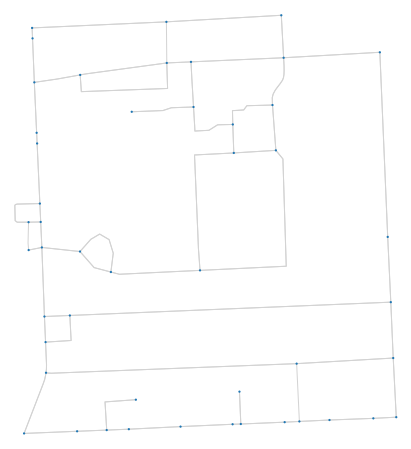

(<Figure size 576x576 with 1 Axes>, <AxesSubplot:>)

In [30]:
G = ox.graph_from_bbox(north, south, east, west, network_type="drive_service")
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']
ox.plot.plot_graph(G, bgcolor='#FFFFFF', node_color=colors[0], edge_color='lightgray', node_size=5)

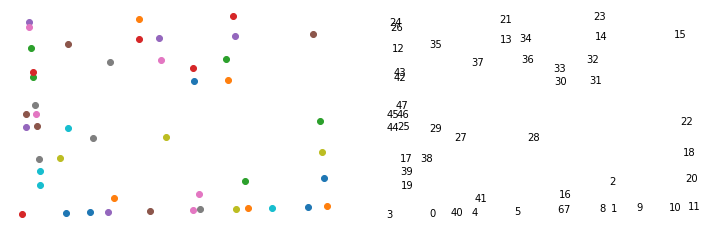

In [31]:
import matplotlib.pyplot as plt
for l in locations:
    lo = locations[l]
    plt.plot(lo[0],lo[1],'o')
    plt.text(lo[0]+.01,lo[1],l,horizontalalignment='center',verticalalignment='center')
    
plt.gca().axis('off');

In [32]:
distance = distances_df

In [33]:
type(df.ID[0])

numpy.int64

In [34]:
distances = dict( ((l1,l2), distance.iloc[l1, l2] ) for l1 in locations for l2 in locations if l1!=l2)
distances

{(0, 1): 402.1,
 (0, 2): 506.6,
 (0, 3): 96.0,
 (0, 4): 93.5,
 (0, 5): 187.1,
 (0, 6): 281.3,
 (0, 7): 296.1,
 (0, 8): 375.4,
 (0, 9): 456.6,
 (0, 10): 535.9,
 (0, 11): 577.4,
 (0, 12): 738.0,
 (0, 13): 980.0,
 (0, 14): 1191.4,
 (0, 15): 1237.5,
 (0, 16): 354.7,
 (0, 17): 314.5,
 (0, 18): 785.5,
 (0, 19): 212.7,
 (0, 20): 684.4,
 (0, 21): 1054.2,
 (0, 22): 903.5,
 (0, 23): 1268.2,
 (0, 24): 836.5,
 (0, 25): 439.4,
 (0, 26): 817.6,
 (0, 27): 578.7,
 (0, 28): 740.5,
 (0, 29): 508.7,
 (0, 30): 1272.0,
 (0, 31): 1364.7,
 (0, 32): 1282.6,
 (0, 33): 1220.4,
 (0, 34): 1023.8,
 (0, 35): 822.0,
 (0, 36): 1105.4,
 (0, 37): 1218.0,
 (0, 38): 360.5,
 (0, 39): 268.2,
 (0, 40): 53.5,
 (0, 41): 160.4,
 (0, 42): 627.6,
 (0, 43): 646.8,
 (0, 44): 463.7,
 (0, 45): 507.5,
 (0, 46): 485.5,
 (0, 47): 518.8,
 (1, 0): 402.1,
 (1, 2): 104.6,
 (1, 3): 498.0,
 (1, 4): 308.5,
 (1, 5): 215.0,
 (1, 6): 120.8,
 (1, 7): 106.0,
 (1, 8): 26.6,
 (1, 9): 54.5,
 (1, 10): 133.8,
 (1, 11): 175.3,
 (1, 12): 1140.1,
 (1, 13)

In [35]:
V = 1 #the number vehicles/people deployed

In [36]:
import networkx as nx
from pulp import *
import seaborn as sn
prob=LpProblem("vehicle", LpMinimize)

In [37]:
#indicates if location i is connected to location j along route 
indicator = LpVariable.dicts('indicator',distances, 0,1,LpBinary)
#elimiate subtours
eliminator = LpVariable.dicts('eliminator', df.ID, 0, len(df.ID)-1, LpInteger)

In [38]:
cost = lpSum([indicator[(i,j)]*distances[(i,j)] for (i,j) in distances])
prob+=cost

In [39]:
#constraints
for v in df.ID:
    cap = 1 if v != 28 else V
    #inward possible route
    prob+= lpSum([ indicator[(i,v)] for i in df.ID if (i,v) in indicator]) ==cap
    #outward possible route
    prob+=lpSum([ indicator[(v,i)] for i in df.ID if (v,i) in indicator]) ==cap
    
#subtour elimination
num=len(df.ID)/V
for i in df.ID:
    for j in df.ID:
        if i != j and (i != 28 and j!= 28) and (i,j) in indicator:
            prob += eliminator[i] - eliminator[j] <= (num)*(1-indicator[(i,j)]) - 1

In [ ]:
%time prob.solve()
print(LpStatus[prob.status])

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /Users/rochelleallan/anaconda3/envs/ox/lib/python3.9/site-packages/pulp/apis/../solverdir/cbc/osx/64/cbc /var/folders/0f/0wx77bhd2sl15rhs858yxhtc0000gn/T/ef1f7fed6e184c62b7c0aa62c3d6181c-pulp.mps branch printingOptions all solution /var/folders/0f/0wx77bhd2sl15rhs858yxhtc0000gn/T/ef1f7fed6e184c62b7c0aa62c3d6181c-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 2263 COLUMNS
At line 20124 RHS
At line 22383 BOUNDS
At line 24687 ENDATA
Problem MODEL has 2258 rows, 2303 columns and 10998 elements
Coin0008I MODEL read with 0 errors
Continuous objective value is 4076.98 - 0.01 seconds
Cgl0003I 0 fixed, 0 tightened bounds, 2162 strengthened rows, 0 substitutions
Cgl0003I 0 fixed, 0 tightened bounds, 2162 strengthened rows, 0 substitutions
Cgl0003I 0 fixed, 0 tightened bounds, 2162 strengthened rows, 0 substitutions
Cgl0003I 0 fixed, 0 tightened bounds, 2162 strengthened r

Cbc0010I After 8900 nodes, 4384 on tree, 9172.6 best solution, best possible 4870.0959 (132.22 seconds)
Cbc0010I After 9000 nodes, 4432 on tree, 9172.6 best solution, best possible 4870.0959 (133.59 seconds)
Cbc0010I After 9100 nodes, 4529 on tree, 9172.6 best solution, best possible 4870.0959 (135.36 seconds)
Cbc0010I After 9200 nodes, 4549 on tree, 9172.6 best solution, best possible 4870.0959 (136.76 seconds)
Cbc0010I After 9300 nodes, 4539 on tree, 9172.6 best solution, best possible 4870.0959 (138.07 seconds)
Cbc0010I After 9400 nodes, 4557 on tree, 9172.6 best solution, best possible 4870.0959 (139.84 seconds)
Cbc0010I After 9500 nodes, 4547 on tree, 9172.6 best solution, best possible 4870.0959 (141.64 seconds)
Cbc0010I After 9600 nodes, 4545 on tree, 9172.6 best solution, best possible 4870.0959 (143.19 seconds)
Cbc0010I After 9700 nodes, 4550 on tree, 9172.6 best solution, best possible 4870.0959 (144.62 seconds)
Cbc0010I After 9800 nodes, 4549 on tree, 9172.6 best solution, b

Cbc0010I After 23900 nodes, 10502 on tree, 8562.4 best solution, best possible 4871.4977 (580.37 seconds)
Cbc0010I After 24000 nodes, 10552 on tree, 8562.4 best solution, best possible 4871.4977 (582.17 seconds)
Cbc0010I After 24100 nodes, 10549 on tree, 8562.4 best solution, best possible 4871.4977 (583.65 seconds)
Cbc0004I Integer solution of 8479.5 found after 1732414 iterations and 24165 nodes (584.83 seconds)
Cbc0010I After 24200 nodes, 10555 on tree, 8479.5 best solution, best possible 4871.4977 (585.38 seconds)
Cbc0010I After 24300 nodes, 10601 on tree, 8479.5 best solution, best possible 4871.4977 (587.12 seconds)
Cbc0010I After 24400 nodes, 10649 on tree, 8479.5 best solution, best possible 4871.4977 (588.90 seconds)
Cbc0010I After 24500 nodes, 10695 on tree, 8479.5 best solution, best possible 4871.4977 (590.60 seconds)
Cbc0010I After 24600 nodes, 10740 on tree, 8479.5 best solution, best possible 4871.4977 (592.23 seconds)
Cbc0010I After 24700 nodes, 10788 on tree, 8479.5 be

Cbc0010I After 38200 nodes, 12684 on tree, 7360.5 best solution, best possible 4871.4977 (789.80 seconds)
Cbc0010I After 38300 nodes, 12730 on tree, 7360.5 best solution, best possible 4871.4977 (791.39 seconds)
Cbc0010I After 38400 nodes, 12777 on tree, 7360.5 best solution, best possible 4871.4977 (793.12 seconds)
Cbc0010I After 38500 nodes, 12824 on tree, 7360.5 best solution, best possible 4871.4977 (794.82 seconds)
Cbc0010I After 38600 nodes, 12873 on tree, 7360.5 best solution, best possible 4871.4977 (796.73 seconds)
Cbc0010I After 38700 nodes, 12921 on tree, 7360.5 best solution, best possible 4871.4977 (798.30 seconds)
Cbc0010I After 38800 nodes, 12970 on tree, 7360.5 best solution, best possible 4871.4977 (799.93 seconds)
Cbc0010I After 38900 nodes, 13015 on tree, 7360.5 best solution, best possible 4871.4977 (801.34 seconds)
Cbc0010I After 39000 nodes, 13060 on tree, 7360.5 best solution, best possible 4871.4977 (802.78 seconds)
Cbc0010I After 39100 nodes, 13065 on tree, 736

Cbc0010I After 53000 nodes, 13433 on tree, 6976.8 best solution, best possible 4871.4977 (1008.96 seconds)
Cbc0010I After 53100 nodes, 13480 on tree, 6976.8 best solution, best possible 4871.4977 (1011.51 seconds)
Cbc0010I After 53200 nodes, 13469 on tree, 6976.8 best solution, best possible 4871.4977 (1013.52 seconds)
Cbc0010I After 53300 nodes, 13467 on tree, 6976.8 best solution, best possible 4871.4977 (1015.20 seconds)
Cbc0010I After 53400 nodes, 13486 on tree, 6976.8 best solution, best possible 4871.4977 (1016.98 seconds)
Cbc0010I After 53500 nodes, 13482 on tree, 6976.8 best solution, best possible 4871.4977 (1018.49 seconds)
Cbc0010I After 53600 nodes, 13479 on tree, 6976.8 best solution, best possible 4871.4977 (1019.82 seconds)
Cbc0010I After 53700 nodes, 13482 on tree, 6976.8 best solution, best possible 4871.4977 (1021.18 seconds)
Cbc0010I After 53800 nodes, 13479 on tree, 6976.8 best solution, best possible 4871.4977 (1022.69 seconds)
Cbc0010I After 53900 nodes, 13471 on 

Cbc0010I After 68100 nodes, 13666 on tree, 6976.8 best solution, best possible 4871.4977 (1253.64 seconds)
Cbc0010I After 68200 nodes, 13673 on tree, 6976.8 best solution, best possible 4871.4977 (1255.16 seconds)
Cbc0010I After 68300 nodes, 13667 on tree, 6976.8 best solution, best possible 4871.4977 (1256.92 seconds)
Cbc0010I After 68400 nodes, 13668 on tree, 6976.8 best solution, best possible 4871.4977 (1258.83 seconds)
Cbc0010I After 68500 nodes, 13669 on tree, 6976.8 best solution, best possible 4871.4977 (1260.11 seconds)
Cbc0010I After 68600 nodes, 13674 on tree, 6976.8 best solution, best possible 4871.4977 (1261.65 seconds)
Cbc0010I After 68700 nodes, 13669 on tree, 6976.8 best solution, best possible 4871.4977 (1263.02 seconds)
Cbc0010I After 68800 nodes, 13667 on tree, 6976.8 best solution, best possible 4871.4977 (1264.75 seconds)
Cbc0010I After 68900 nodes, 13668 on tree, 6976.8 best solution, best possible 4871.4977 (1266.54 seconds)
Cbc0010I After 69000 nodes, 13674 on 

Cbc0010I After 83300 nodes, 14403 on tree, 6715.9 best solution, best possible 4871.4977 (1515.81 seconds)
Cbc0010I After 83400 nodes, 14408 on tree, 6715.9 best solution, best possible 4871.4977 (1517.14 seconds)
Cbc0010I After 83500 nodes, 14400 on tree, 6715.9 best solution, best possible 4871.4977 (1518.26 seconds)
Cbc0010I After 83600 nodes, 14396 on tree, 6715.9 best solution, best possible 4871.4977 (1519.82 seconds)
Cbc0010I After 83700 nodes, 14403 on tree, 6715.9 best solution, best possible 4871.4977 (1521.17 seconds)
Cbc0010I After 83800 nodes, 14401 on tree, 6715.9 best solution, best possible 4871.4977 (1522.34 seconds)
Cbc0010I After 83900 nodes, 14409 on tree, 6715.9 best solution, best possible 4871.4977 (1523.84 seconds)
Cbc0010I After 84000 nodes, 14398 on tree, 6715.9 best solution, best possible 4871.4977 (1525.15 seconds)
Cbc0010I After 84100 nodes, 14400 on tree, 6715.9 best solution, best possible 4871.4977 (1526.65 seconds)
Cbc0010I After 84200 nodes, 14412 on 

Cbc0010I After 98600 nodes, 14681 on tree, 6715.9 best solution, best possible 4871.4977 (1731.05 seconds)
Cbc0010I After 98700 nodes, 14668 on tree, 6715.9 best solution, best possible 4871.4977 (1732.65 seconds)
Cbc0010I After 98800 nodes, 14667 on tree, 6715.9 best solution, best possible 4871.4977 (1734.07 seconds)
Cbc0010I After 98900 nodes, 14679 on tree, 6715.9 best solution, best possible 4871.4977 (1735.65 seconds)
Cbc0010I After 99000 nodes, 14669 on tree, 6715.9 best solution, best possible 4871.4977 (1736.98 seconds)
Cbc0010I After 99100 nodes, 14668 on tree, 6715.9 best solution, best possible 4871.4977 (1738.45 seconds)
Cbc0010I After 99200 nodes, 14668 on tree, 6715.9 best solution, best possible 4871.4977 (1739.88 seconds)
Cbc0010I After 99300 nodes, 14663 on tree, 6715.9 best solution, best possible 4871.4977 (1741.12 seconds)
Cbc0010I After 99400 nodes, 14666 on tree, 6715.9 best solution, best possible 4871.4977 (1742.60 seconds)
Cbc0010I After 99500 nodes, 14662 on 

Cbc0010I After 113600 nodes, 14661 on tree, 6715.9 best solution, best possible 4871.4977 (1942.19 seconds)
Cbc0010I After 113700 nodes, 14668 on tree, 6715.9 best solution, best possible 4871.4977 (1943.77 seconds)
Cbc0010I After 113800 nodes, 14662 on tree, 6715.9 best solution, best possible 4871.4977 (1945.12 seconds)
Cbc0010I After 113900 nodes, 14664 on tree, 6715.9 best solution, best possible 4871.4977 (1946.83 seconds)
Cbc0010I After 114000 nodes, 14661 on tree, 6715.9 best solution, best possible 4871.4977 (1948.41 seconds)
Cbc0010I After 114100 nodes, 14657 on tree, 6715.9 best solution, best possible 4871.4977 (1949.80 seconds)
Cbc0010I After 114200 nodes, 14652 on tree, 6715.9 best solution, best possible 4871.4977 (1951.39 seconds)
Cbc0010I After 114300 nodes, 14666 on tree, 6715.9 best solution, best possible 4871.4977 (1952.72 seconds)
Cbc0010I After 114400 nodes, 14662 on tree, 6715.9 best solution, best possible 4871.4977 (1954.00 seconds)
Cbc0010I After 114500 nodes,

Cbc0010I After 128700 nodes, 14660 on tree, 6715.9 best solution, best possible 4871.4977 (2175.86 seconds)
Cbc0010I After 128800 nodes, 14664 on tree, 6715.9 best solution, best possible 4871.4977 (2177.47 seconds)
Cbc0010I After 128900 nodes, 14657 on tree, 6715.9 best solution, best possible 4871.4977 (2179.00 seconds)
Cbc0010I After 129000 nodes, 14659 on tree, 6715.9 best solution, best possible 4871.4977 (2180.69 seconds)
Cbc0010I After 129100 nodes, 14655 on tree, 6715.9 best solution, best possible 4871.4977 (2182.38 seconds)
Cbc0010I After 129200 nodes, 14663 on tree, 6715.9 best solution, best possible 4871.4977 (2183.86 seconds)
Cbc0010I After 129300 nodes, 14656 on tree, 6715.9 best solution, best possible 4871.4977 (2185.21 seconds)
Cbc0010I After 129400 nodes, 14662 on tree, 6715.9 best solution, best possible 4871.4977 (2186.59 seconds)
Cbc0010I After 129500 nodes, 14658 on tree, 6715.9 best solution, best possible 4871.4977 (2187.94 seconds)
Cbc0038I Full problem 2258 r

Cbc0010I After 143700 nodes, 14652 on tree, 6715.9 best solution, best possible 4871.4977 (2412.13 seconds)
Cbc0010I After 143800 nodes, 14658 on tree, 6715.9 best solution, best possible 4871.4977 (2413.91 seconds)
Cbc0010I After 143900 nodes, 14655 on tree, 6715.9 best solution, best possible 4871.4977 (2415.54 seconds)
Cbc0010I After 144000 nodes, 14669 on tree, 6715.9 best solution, best possible 4871.4977 (2417.40 seconds)
Cbc0010I After 144100 nodes, 14652 on tree, 6715.9 best solution, best possible 4871.4977 (2419.11 seconds)
Cbc0010I After 144200 nodes, 14673 on tree, 6715.9 best solution, best possible 4871.4977 (2421.04 seconds)
Cbc0010I After 144300 nodes, 14667 on tree, 6715.9 best solution, best possible 4871.4977 (2422.67 seconds)
Cbc0010I After 144400 nodes, 14658 on tree, 6715.9 best solution, best possible 4871.4977 (2424.10 seconds)
Cbc0010I After 144500 nodes, 14654 on tree, 6715.9 best solution, best possible 4871.4977 (2425.39 seconds)
Cbc0010I After 144600 nodes,

Cbc0010I After 158900 nodes, 14648 on tree, 6715.9 best solution, best possible 4871.4977 (2653.52 seconds)
Cbc0010I After 159000 nodes, 14645 on tree, 6715.9 best solution, best possible 4871.4977 (2654.94 seconds)
Cbc0010I After 159100 nodes, 14652 on tree, 6715.9 best solution, best possible 4871.4977 (2656.63 seconds)
Cbc0010I After 159200 nodes, 14646 on tree, 6715.9 best solution, best possible 4871.4977 (2658.08 seconds)
Cbc0010I After 159300 nodes, 14656 on tree, 6715.9 best solution, best possible 4871.4977 (2659.55 seconds)
Cbc0010I After 159400 nodes, 14646 on tree, 6715.9 best solution, best possible 4871.4977 (2660.81 seconds)
Cbc0010I After 159500 nodes, 14652 on tree, 6715.9 best solution, best possible 4871.4977 (2662.24 seconds)
Cbc0010I After 159600 nodes, 14646 on tree, 6715.9 best solution, best possible 4871.4977 (2663.61 seconds)
Cbc0010I After 159700 nodes, 14648 on tree, 6715.9 best solution, best possible 4871.4977 (2664.86 seconds)
Cbc0010I After 159800 nodes,

Cbc0010I After 173900 nodes, 14655 on tree, 6715.9 best solution, best possible 4871.4977 (2875.76 seconds)
Cbc0010I After 174000 nodes, 14655 on tree, 6715.9 best solution, best possible 4871.4977 (2877.42 seconds)
Cbc0010I After 174100 nodes, 14661 on tree, 6715.9 best solution, best possible 4871.4977 (2879.07 seconds)
Cbc0010I After 174200 nodes, 14658 on tree, 6715.9 best solution, best possible 4871.4977 (2880.67 seconds)
Cbc0010I After 174300 nodes, 14648 on tree, 6715.9 best solution, best possible 4871.4977 (2882.15 seconds)
Cbc0010I After 174400 nodes, 14650 on tree, 6715.9 best solution, best possible 4871.4977 (2883.22 seconds)
Cbc0010I After 174500 nodes, 14650 on tree, 6715.9 best solution, best possible 4871.4977 (2884.37 seconds)
Cbc0010I After 174600 nodes, 14651 on tree, 6715.9 best solution, best possible 4871.4977 (2885.89 seconds)
Cbc0010I After 174700 nodes, 14650 on tree, 6715.9 best solution, best possible 4871.4977 (2887.22 seconds)
Cbc0010I After 174800 nodes,

Cbc0010I After 189100 nodes, 14649 on tree, 6715.9 best solution, best possible 4871.4977 (3107.09 seconds)
Cbc0010I After 189200 nodes, 14648 on tree, 6715.9 best solution, best possible 4871.4977 (3108.73 seconds)
Cbc0010I After 189300 nodes, 14649 on tree, 6715.9 best solution, best possible 4871.4977 (3116.43 seconds)
Cbc0010I After 189400 nodes, 14650 on tree, 6715.9 best solution, best possible 4871.4977 (3122.84 seconds)
Cbc0010I After 189500 nodes, 14648 on tree, 6715.9 best solution, best possible 4871.4977 (3128.46 seconds)
Cbc0010I After 189600 nodes, 14648 on tree, 6715.9 best solution, best possible 4871.4977 (3135.04 seconds)
Cbc0010I After 189700 nodes, 14646 on tree, 6715.9 best solution, best possible 4871.4977 (3143.48 seconds)
Cbc0010I After 189800 nodes, 14653 on tree, 6715.9 best solution, best possible 4871.4977 (3149.94 seconds)
Cbc0010I After 189900 nodes, 14647 on tree, 6715.9 best solution, best possible 4871.4977 (3151.34 seconds)
Cbc0010I After 190000 nodes,

Cbc0010I After 204000 nodes, 14660 on tree, 6715.9 best solution, best possible 4871.4977 (5237.38 seconds)
Cbc0010I After 204100 nodes, 14653 on tree, 6715.9 best solution, best possible 4871.4977 (5242.85 seconds)
Cbc0010I After 204200 nodes, 14653 on tree, 6715.9 best solution, best possible 4871.4977 (5245.66 seconds)
Cbc0010I After 204300 nodes, 14670 on tree, 6715.9 best solution, best possible 4871.4977 (5247.43 seconds)
Cbc0010I After 204400 nodes, 14670 on tree, 6715.9 best solution, best possible 4871.4977 (5249.04 seconds)
Cbc0010I After 204500 nodes, 14663 on tree, 6715.9 best solution, best possible 4871.4977 (5250.58 seconds)
Cbc0010I After 204600 nodes, 14659 on tree, 6715.9 best solution, best possible 4871.4977 (5251.62 seconds)
Cbc0010I After 204700 nodes, 14652 on tree, 6715.9 best solution, best possible 4871.4977 (5252.49 seconds)
Cbc0010I After 204800 nodes, 14653 on tree, 6715.9 best solution, best possible 4871.4977 (5253.36 seconds)
Cbc0010I After 204900 nodes,

In [ ]:
feasible_edges = [ e for e in indicator if value(indicator[e]) != 0 ]

def get_next_loc(initial):
    '''to get the next edge'''
    edges = [e for e in feasible_edges if e[0]==initial]
    for e in edges:
        feasible_edges.remove(e)
    return edges

In [ ]:
routes = get_next_loc(28)
routes = [ [e] for e in routes ]

for r in routes:
    while r[-1][1] !=28:
        r.append(get_next_loc(r[-1][1])[-1])

In [ ]:
routes

In [ ]:
routes1 = routes

In [ ]:
import numpy as np
#outline the routes
coloured_loc = [np.random.rand(3) for i in range(len(routes))]
for r,co in zip(routes,coloured_loc):
    for a,b in r:
        l1,l2 = locations[a], locations[b]
        plt.plot([l1[0],l2[0]],[l1[1],l2[1]], color=co)

In [ ]:
#outline the routes
coloured_loc = [np.random.rand(3) for i in range(len(routes))]
for r,co in zip(routes,coloured_loc):
    for a,b in r:
        l1,l2 = locations[a], locations[b]
        plt.plot([l1[0],l2[0]],[l1[1],l2[1]], color=co)
for l in locations:
    lo = locations[l]
    plt.plot(lo[0],lo[1],'o')
    plt.text(lo[0]+.01,lo[1],l,horizontalalignment='center',verticalalignment='center')
    
    
plt.title('%d '%V + 'Vehicle routes' if V > 1 else 'Vehicle route')
plt.xlabel('Left')
plt.ylabel('Right')
plt.show()

In [ ]:
from ortools.constraint_solver import routing_enums_pb2
from ortools.constraint_solver import pywrapcp

In [ ]:
def create_data_model():
    """Stores the data for the problem."""
    data = {}
    data['distance_matrix'] = distance
       
    data['num_vehicles'] = 1
    data['depot'] = 6
    return data

In [ ]:
def print_solution(data, manager, routing, solution):
    """Prints solution on console."""
    max_route_distance = 0
    for vehicle_id in range(data['num_vehicles']):
        index = routing.Start(vehicle_id)
        plan_output = 'Route for vehicle {}:\n'.format(vehicle_id)
        route_distance = 0
        while not routing.IsEnd(index):
            plan_output += ' {} -> '.format(manager.IndexToNode(index))
            previous_index = index
            index = solution.Value(routing.NextVar(index))
            route_distance += routing.GetArcCostForVehicle(
                previous_index, index, vehicle_id)
        plan_output += '{}\n'.format(manager.IndexToNode(index))
       #plan_output += 'Distance of the route: {}m\n'.format(route_distance)
        print(plan_output)
        max_route_distance = max(route_distance, max_route_distance)
    #print('Maximum of the route distances: {}m'.format(max_route_distance))

In [ ]:
def main():
    """Solve the CVRP problem."""
    # Instantiate the data problem.
    data = create_data_model()

    # Create the routing index manager.
    manager = pywrapcp.RoutingIndexManager(len(data['distance_matrix']),
                                           data['num_vehicles'], data['depot'])

    # Create Routing Model.
    routing = pywrapcp.RoutingModel(manager)


    # Create and register a transit callback.
    def distance_callback(from_index, to_index):
        """Returns the distance between the two nodes."""
        # Convert from routing variable Index to distance matrix NodeIndex.
        from_node = manager.IndexToNode(from_index)
        to_node = manager.IndexToNode(to_index)
        return data['distance_matrix'][from_node][to_node]

    transit_callback_index = routing.RegisterTransitCallback(distance_callback)

    # Define cost of each arc.
    routing.SetArcCostEvaluatorOfAllVehicles(transit_callback_index)

    # Add Distance constraint.
    dimension_name = 'Distance'
    routing.AddDimension(
        transit_callback_index,
        0,  # no slack
        3000,  # vehicle maximum travel distance
        True,  # start cumul to zero
        dimension_name)
    distance_dimension = routing.GetDimensionOrDie(dimension_name)
    distance_dimension.SetGlobalSpanCostCoefficient(100)

    # Setting first solution heuristic.
    search_parameters = pywrapcp.DefaultRoutingSearchParameters()
    search_parameters.first_solution_strategy = (
        routing_enums_pb2.FirstSolutionStrategy.PATH_CHEAPEST_ARC)

    # Solve the problem.
    solution = routing.SolveWithParameters(search_parameters)

    # Print solution on console.
    if solution:
        print_solution(data, manager, routing, solution)
if __name__ == '__main__':
    main()

In [ ]:
routes